<a href="https://colab.research.google.com/github/mohanaditya910/eip-season4-batch1/blob/master/week2/final_submission_max_12k_LRS_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

#image standardization........
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#image normalization................
X_train=(X_train-np.mean(X_train))/np.std(X_train)
X_test=(X_test-np.mean(X_test))/np.std(X_test)

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


In [0]:
#praying to the heavenly gods........................
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Flatten,Activation,Dropout
from keras.optimizers import Adam
from keras.regularizers import l1,l1_l2,l2
from keras.initializers import TruncatedNormal

In [0]:
def skeleton(input_shape,num_classes,n_c_factor_3,n_c_1,layers_in_block,dropout,l1_value):

  model=Sequential()
  for i in range(layers_in_block):
    if i==0:
      model.add(Conv2D(((i+1)*n_c_factor_3),kernel_size=3,input_shape=(28,28,1),activation='relu',kernel_regularizer=l1(l1_value),use_bias=False,kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
      model.add(BatchNormalization())
    else:
      model.add(Conv2D(((i+1)*n_c_factor_3),kernel_size=3,activation='relu',kernel_regularizer=l1(l1_value),use_bias=False,kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
      model.add(BatchNormalization())
  model.add(Dropout(dropout))
  model.add(MaxPooling2D(pool_size=(2,2),strides=2))
  model.add(Conv2D(filters=n_c_1,kernel_size=1,activation='relu',kernel_regularizer=l1(l1_value),use_bias=False,kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
  model.add(BatchNormalization())

  for i in range(layers_in_block):
    model.add(Conv2D(((i+1)*n_c_factor_3),kernel_size=3,activation='relu',kernel_regularizer=l1(l1_value),use_bias=False,kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
    model.add(BatchNormalization())
  model.add(Dropout(dropout))
  #no maxpooling
  model.add(Conv2D(filters=num_classes,kernel_size=1,activation='relu',kernel_regularizer=l1(l1_value),use_bias=False,kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
  #activation is avoided.
  model.add(Conv2D(filters=num_classes,kernel_size=3,kernel_regularizer=l1(l1_value),use_bias=False,kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
  model.add(Conv2D(filters=num_classes,kernel_size=3,kernel_regularizer=l1(l1_value),use_bias=False,kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
  ##

  model.add(Flatten())
  model.add(Activation('softmax'))

  return model

In [0]:
def scheduler(epoch, lr):
  if epoch<9:
    return round(0.004 * 1/(1 + 0.319 * epoch), 10)
  else:
    return round(0.0004 * 1/(1 + 0.319 * epoch), 10)

def scheduler(epoch, lr):
  if epoch<=6:
    return round(0.004 * 1/(1 + 0.319 * epoch), 10)
  elif epoch in [7,8,9,11,12,13,15,16,17,19]:
    return round(0.0004 * 1/(1 + 0.319 * epoch), 10)

  elif epoch in [10,14]:
    return round(0.004 * 1/(1 + 0.319 * epoch), 10)

In [36]:
input_shape=(28,28,1)
num_classes=10
layers_in_block=3


n_c_factor_3=8
n_c_1=8
dropout=0.05
opt=Adam(lr=0.004)
l1_value=0.00005


from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  if epoch<=6:
    return round(0.004 * 1/(1 + 0.319 * epoch), 10)
  elif epoch in [7,8,9,11,12,13,14,16,17,18,19]:
    return round(0.0004 * 1/(1 + 0.319 * epoch), 10)

  elif epoch in [10,15]:
    return round(0.004 * 1/(1 + 0.319 * epoch), 10)




model=skeleton(input_shape,num_classes,n_c_factor_3,n_c_1,layers_in_block,dropout,l1_value)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

#l1 0.00001 99.31
#l1 0.0001  99.31, 
#l1 0.0001  99.31, do 0.1
#lr0.002    99.27
#lr0.004, l1 0.0001 99.32
#lr0.004  l1 0.00001 99.17
#lr0.004  l1 0.000001 99.29
#truncated initializer

#lr0.004  l1 0.00001  99.24
#lr0.004  l1 0.00001 lrs 99.34 consistently hitting 99.3 overfitting.. to reduce (reducing lr further by 10)
#lr0.004  l1 0.00005 lrs 99.38 same pattern...
#lr0.004  l1 0.0001 lrs 99.33
#lr0.004  l1 0.00005 new lrs(4,4 to find local min) 99.48

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_64 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 24, 24, 16)        1152      
_________________________________________________________________
batch_normalization_65 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 22, 22, 24)        3456      
_________________________________________________________________
batch_normalization_66 (Batc (None, 22, 22, 24)        96        
_________________________________________________________________
dropout_19 (Dropout)         (None, 22, 22, 24)      

In [37]:
history=model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1,validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.004.
60000/60000 [==============================] - 45s 743us/step - loss: 0.2222 - acc: 0.9461 - val_loss: 0.1287 - val_acc: 0.9749
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0030326005.
60000/60000 [==============================] - 38s 627us/step - loss: 0.1239 - acc: 0.9787 - val_loss: 0.1082 - val_acc: 0.9839
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0024420024.
60000/60000 [==============================] - 38s 628us/step - loss: 0.1110 - acc: 0.9822 - val_loss: 0.1037 - val_acc: 0.9855
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0020439448.
60000/60000 [==============================] - 38s 627us/step - loss: 0.1016 - acc: 0.9849 - val_loss: 0.1004 - val_acc: 0.9861
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0017574692.
60000/60000 [==

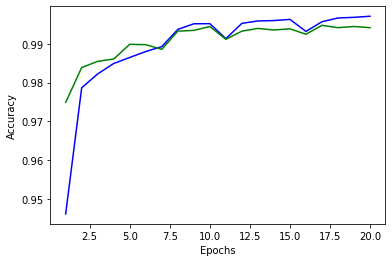

In [38]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'b',label='Train_acc')
plt.plot(epochs,val_acc,'g',label='Val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [39]:
model.evaluate(X_test,Y_test)

10000/10000 [==============================] - 1s 143us/step


[0.05891113919615745, 0.9942]



As we are going to use regularizer, i thought of checking out with different Learning Rates and 0.04 gave me the best value. So i stuck with it...

Next part is introducing truncated initializer..which according to the keras documentation performs better on weights and filters..generally nature follows bell curve distribution..so went for this...

then started to play with l1 regularizer value...from previous experience i used 3 values for regularizers 0.00005,0.00001,0.0001(99.38,99.34,99.33 val_acc). 0.00005 is in between the other values and its obtained val_acc is greatest among the 3 l1 values , hence its kind of peaking. so better to stay with that.

for all these values, val_acc,train_acc plots in (epochs and acc) the curves appear to be smooth for the last 7-8 epochs.

now the redifining and better using Learning rate scheduler to explore the local minimas exposed by the regularizer.

for the last 10 epochs,decrement of by 10 (lr*0.1) to the learning rate scheduler already provided is done.

this leads to the exploration of only one minima which may or may not contain the required minima.

hence to give the model a chance to better the exploration, i have taken 3 batches of epochs of size 4 ([7,8,9,10],[12,13,14,15],[17,18,19]) and then applied learning rate as obtained above. but for the left over values i have not decremnted by 10 meaning, the value as it is provided by the previous scheduler is taken. this will make the model to explore 3 neighborhood of minimas giving it a better chance to find the best weights

this has given consistent values..of val_acc over 99.4 in epochs 11 to 20...
 
this can be observed in logs...